In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
dataset = pd.read_csv("abalone.data", names=column_names)
print(dataset.shape)
dataset.head()

(4177, 9)


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3759, 9)
Unseen Data For Predictions: (418, 9)


In [4]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'sex', session_id=123) 

,Description,Value
0,session_id,123
1,Target,sex
2,Target Type,Multiclass
3,Label Encoded,"F: 0, I: 1, M: 2"
4,Original Data,"(3759, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5526,0.7535,0.5483,0.5444,0.5322,0.3227,0.3314,0.5830
gbc,Gradient Boosting Classifier,0.5469,0.7457,0.5450,0.5354,0.5357,0.3159,0.3192,0.2040
rf,Random Forest Classifier,0.5450,0.7403,0.5460,0.5383,0.5395,0.3152,0.3165,0.1110
et,Extra Trees Classifier,0.5443,0.7420,0.5454,0.5362,0.5384,0.3142,0.3153,0.0750
ada,Ada Boost Classifier,0.5439,0.7189,0.5438,0.5339,0.5318,0.3126,0.3163,0.0440
lda,Linear Discriminant Analysis,0.5405,0.7459,0.5385,0.5346,0.5298,0.3057,0.3098,0.2100
lightgbm,Light Gradient Boosting Machine,0.5374,0.7350,0.5383,0.5326,0.5330,0.3037,0.3050,0.1880
ridge,Ridge Classifier,0.5340,0.0000,0.5329,0.5151,0.5113,0.2975,0.3046,0.0660
qda,Quadratic Discriminant Analysis,0.5245,0.7356,0.5322,0.5094,0.5003,0.2903,0.3003,0.0250
nb,Naive Bayes,0.5226,0.7344,0.5398,0.5037,0.4738,0.2946,0.3171,0.0040


In [26]:
# Logistic Regression
lr = create_model('lr')
tuned_lr = tune_model(lr)
final_lr = finalize_model(tuned_lr)
predictions_lr = predict_model(final_lr, data=data_unseen)
sum(predictions_lr['Score'])/len(predictions_lr['Score'])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5758,0.7702,0.5746,0.5770,0.5636,0.3596,0.3663
1,0.5399,0.7254,0.5371,0.5242,0.5222,0.3051,0.3107
2,0.5627,0.7512,0.5600,0.5533,0.5483,0.3398,0.3452
3,0.5209,0.7445,0.5196,0.5167,0.5046,0.2768,0.2833
4,0.5703,0.7567,0.5670,0.5545,0.5521,0.3506,0.3568
5,0.6008,0.7670,0.5959,0.5968,0.5882,0.3959,0.4024
6,0.5171,0.7400,0.5172,0.4943,0.4961,0.2724,0.2774
7,0.5894,0.7646,0.5869,0.5819,0.5704,0.3792,0.3878
8,0.5894,0.7684,0.5895,0.5762,0.5709,0.3814,0.3886
9,0.5817,0.7833,0.5817,0.5652,0.5685,0.3697,0.3727


0.5559124401913874

In [16]:
# Gradient Boosting Classifier
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc)
predict_model(tuned_gbc);
final_gbc = finalize_model(tuned_gbc)
predictions_gbc = predict_model(final_gbc, data=data_unseen)
sum(predictions_gbc['Score'])/len(predictions_gbc['Score'])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5455,0.7507,0.5462,0.5388,0.5394,0.3151,0.3166
1,0.5361,0.7185,0.5319,0.5284,0.5222,0.2978,0.3041
2,0.5703,0.7619,0.5678,0.5580,0.5611,0.3524,0.3543
3,0.5627,0.7439,0.5573,0.5623,0.5479,0.3373,0.3457
4,0.5095,0.7318,0.5080,0.5027,0.5046,0.2599,0.2608
5,0.5894,0.7708,0.5862,0.5868,0.5821,0.3789,0.3829
6,0.5399,0.7362,0.5421,0.5365,0.5378,0.3074,0.3077
7,0.5856,0.7715,0.5817,0.5791,0.5723,0.3727,0.3789
8,0.5399,0.7507,0.5407,0.5101,0.5180,0.3072,0.3111
9,0.6350,0.8040,0.6309,0.6269,0.6243,0.4478,0.4529


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5665,0.7652,0.5606,0.5639,0.5549,0.3431,0.3497


0.5154523923444972

In [19]:
# Random Forest Classifier
rf = create_model('rf')
tuned_rf = tune_model(rf)
predict_model(tuned_rf);
final_rf = finalize_model(tuned_rf)
predictions_rf = predict_model(final_rf, data=data_unseen)
sum(predictions_rf['Score'])/len(predictions_rf['Score'])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5341,0.7462,0.5463,0.5192,0.5134,0.3069,0.3151
1,0.5361,0.7116,0.5428,0.5274,0.5272,0.3067,0.3094
2,0.5057,0.7512,0.5159,0.4938,0.4866,0.2649,0.2727
3,0.5513,0.7377,0.5579,0.5458,0.5431,0.3298,0.3332
4,0.5703,0.7442,0.5818,0.5715,0.5569,0.3610,0.3705
5,0.5894,0.7705,0.5988,0.5852,0.5794,0.3876,0.3931
6,0.5209,0.7425,0.5310,0.5140,0.5123,0.2850,0.2885
7,0.6084,0.7855,0.6150,0.5993,0.5990,0.4143,0.4176
8,0.5627,0.7665,0.5749,0.5454,0.5381,0.3496,0.3596
9,0.6350,0.8003,0.6428,0.6342,0.6288,0.4549,0.4593


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5496,0.7594,0.5571,0.5408,0.5406,0.3273,0.3304


0.5470521531100477

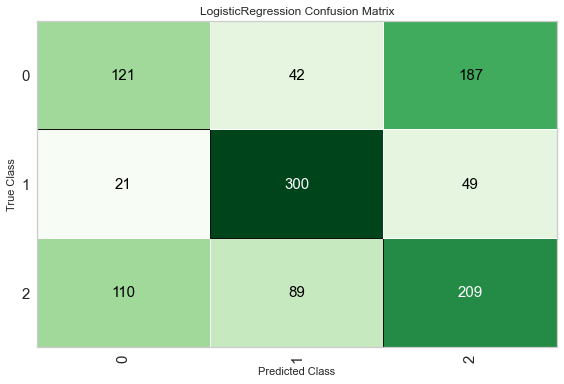

In [20]:
plot_model(tuned_lr, plot = 'confusion_matrix')

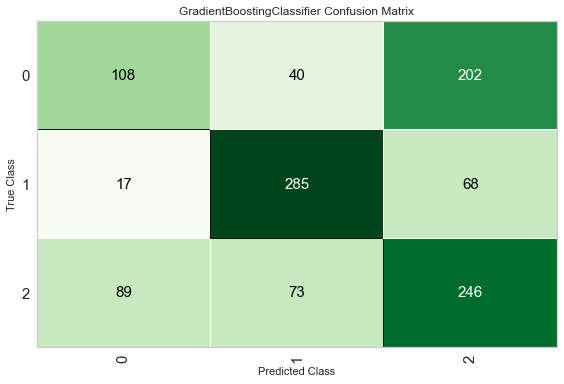

In [21]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

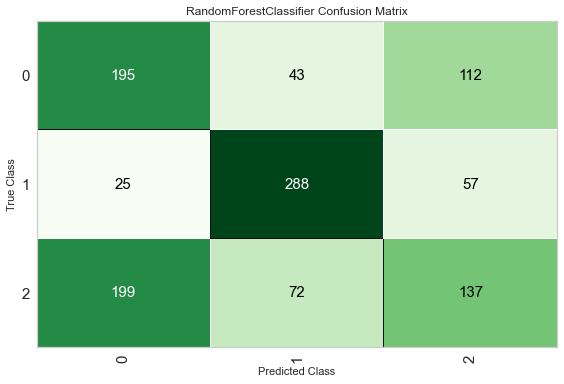

In [22]:
plot_model(tuned_rf, plot = 'confusion_matrix')

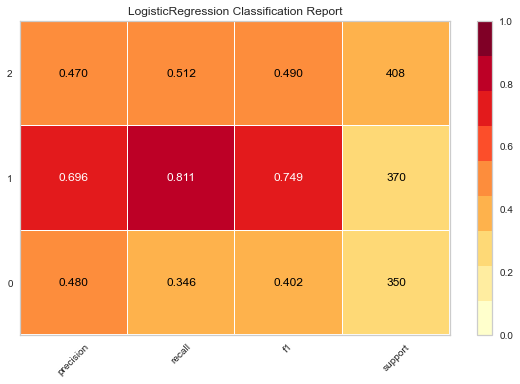

In [23]:
plot_model(tuned_lr, plot='class_report')

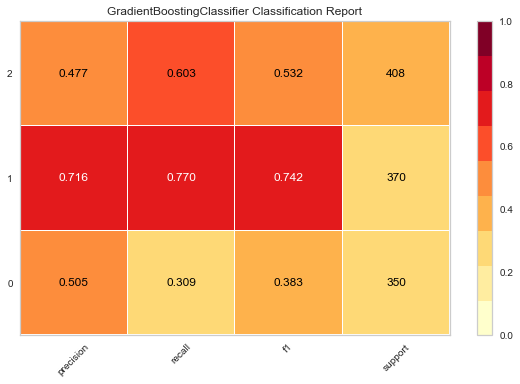

In [24]:
plot_model(tuned_gbc, plot = 'class_report')

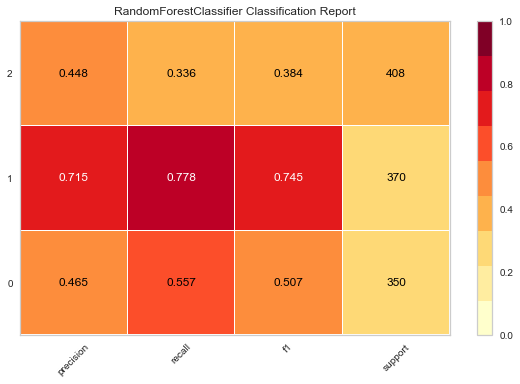

In [25]:
plot_model(tuned_rf, plot = 'class_report')